In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tech_fundings.csv")
df.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [3]:
df.shape

(3575, 8)

In [4]:
df.rename(columns={"Funding Amount (USD)":"Funding_Amount_(USD)", "Funding Stage":"Funding_Stage", "Funding Date":"Funding_Date"}, inplace=True)

In [5]:
df.shape

(3575, 8)

In [6]:
df['Funding_Amount_(USD)'].dtype

dtype('O')

In [7]:
a = "NaN"
df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].apply(lambda x: x.replace('Unknown',a))

In [8]:
df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].astype(float)

In [9]:
df['Funding_Amount_(USD)'].dtype

dtype('float64')

In [10]:
df = df.iloc[:, 1:]
df.head()

,Company,Website,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940.0,Seed,Jan-20
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244.0,Seed,Jan-20
2,api.video,https://api.video,France,Developer APIs,300000.0,Seed,Jan-20
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000.0,Seed,Jan-20
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013.0,Seed,Jan-20


In [11]:
del df["Website"]
df.head()

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,Spain,Blockchain,278940.0,Seed,Jan-20
1,Dockflow,Belgium,Logistics,292244.0,Seed,Jan-20
2,api.video,France,Developer APIs,300000.0,Seed,Jan-20
3,Buck.ai,United States,Artificial Intelligence,300000.0,Seed,Jan-20
4,Prodsight,United Kingdom,Artificial Intelligence,529013.0,Seed,Jan-20


In [12]:
df['Funding_Date'] = "01-" +  df['Funding_Date']
df['Funding_Date'] = pd.to_datetime(df['Funding_Date'])
df.head()

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,Spain,Blockchain,278940.0,Seed,2020-01-01
1,Dockflow,Belgium,Logistics,292244.0,Seed,2020-01-01
2,api.video,France,Developer APIs,300000.0,Seed,2020-01-01
3,Buck.ai,United States,Artificial Intelligence,300000.0,Seed,2020-01-01
4,Prodsight,United Kingdom,Artificial Intelligence,529013.0,Seed,2020-01-01


In [13]:
df["Funding_Date"].dtype

dtype('<M8[ns]')

In [14]:
df.isnull().sum()

Company                  0
Region                  12
Vertical                 0
Funding_Amount_(USD)     9
Funding_Stage            0
Funding_Date             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               3575 non-null   object        
 1   Region                3563 non-null   object        
 2   Vertical              3575 non-null   object        
 3   Funding_Amount_(USD)  3566 non-null   float64       
 4   Funding_Stage         3575 non-null   object        
 5   Funding_Date          3575 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 167.7+ KB


In [16]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent],axis=1, keys=["missing_number", "missing_percent"])
    return missing_values
missing(df)

,missing_number,missing_percent
Region,12,0.003357
Funding_Amount_(USD),9,0.002517
Company,0,0.000000
Vertical,0,0.000000
Funding_Stage,0,0.000000
Funding_Date,0,0.000000


In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df["Region"] = df["Region"].fillna(value=df["Region"].mode()[0])

In [19]:
df["Funding_Amount_(USD)"] = df["Funding_Amount_(USD)"].fillna(value=df["Funding_Amount_(USD)"].mean())

In [20]:
df["Funding_Amount_(USD)"].mean() 

57560140.99887829

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 3574
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               3575 non-null   object        
 1   Region                3575 non-null   object        
 2   Vertical              3575 non-null   object        
 3   Funding_Amount_(USD)  3575 non-null   float64       
 4   Funding_Stage         3575 non-null   object        
 5   Funding_Date          3575 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 195.5+ KB


In [22]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent],axis=1, keys=["missing_number", "missing_percent"])
    return missing_values
missing(df)

,missing_number,missing_percent
Company,0,0.0
Region,0,0.0
Vertical,0,0.0
Funding_Amount_(USD),0,0.0
Funding_Stage,0,0.0
Funding_Date,0,0.0


In [23]:
df["Funding_Amount_(USD)"].describe()

count    3.575000e+03
mean     5.756014e+07
std      2.978219e+08
min      4.000000e+04
25%      5.000000e+06
50%      1.550000e+07
75%      5.000000e+07
max      1.660000e+10
Name: Funding_Amount_(USD), dtype: float64

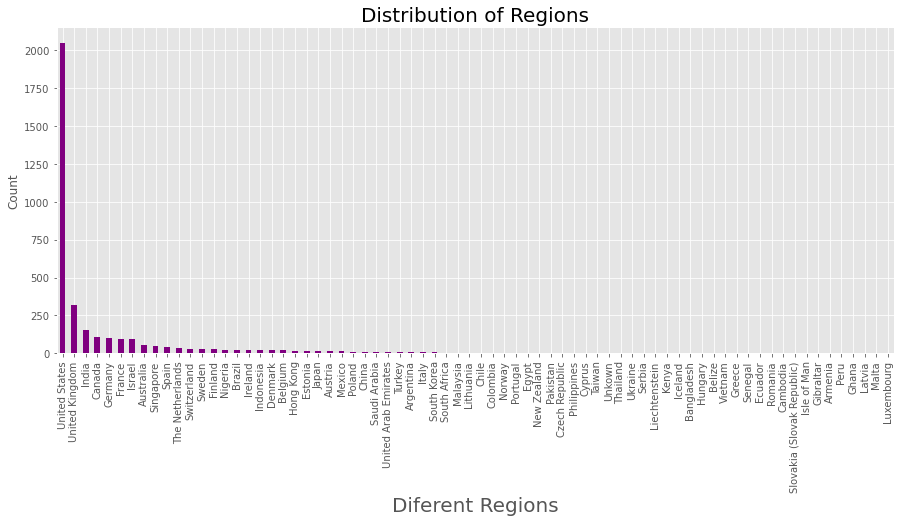

In [24]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

df['Region'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Distribution of Regions', fontsize = 20)
plt.xlabel('Diferent Regions', fontsize = 20)
plt.ylabel('Count')
plt.show()

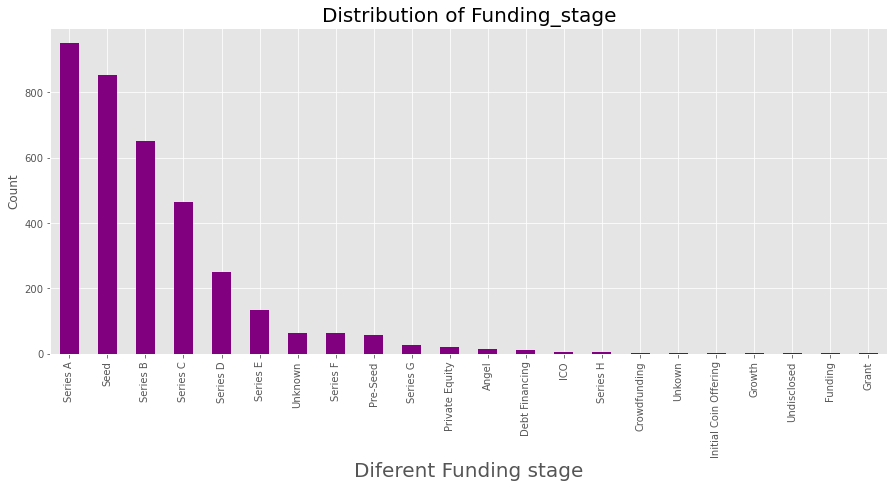

In [25]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

df['Funding_Stage'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Distribution of Funding_stage', fontsize = 20)
plt.xlabel('Diferent Funding stage', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [26]:
Region = df['Region'].value_counts().sort_values(ascending=False).head(15)
Region = Region.reset_index().rename(columns={'index':'Region','Region':'Total_No.'})
Region

,Region,Total_No.
0,United States,2046
1,United Kingdom,319
2,India,156
3,Canada,111
4,Germany,101
5,France,96
6,Israel,93
7,Australia,53
8,Singapore,50
9,Spain,42


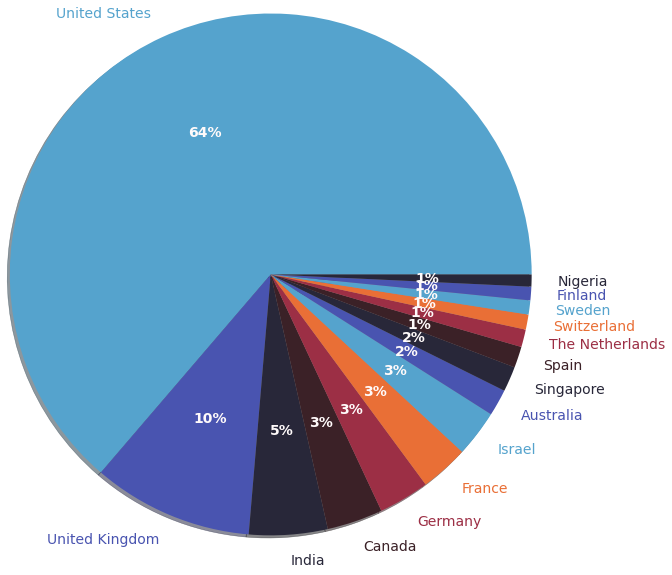

In [27]:
colors = sns.set_palette('icefire')
patches,text, pcts= plt.pie(x='Total_No.',labels='Region',autopct='%1.0f%%',data=Region,colors=colors,
                            radius=2,shadow=True,textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [28]:
Vertical = df["Vertical"].value_counts().sort_values(ascending=False).head(15)
Vertical = Vertical.reset_index().rename(columns={'index':'Vertical','Vertical':'Total_No.'})
Vertical

,Vertical,Total_No.
0,B2B Software,632
1,Cloud Computing,288
2,Artificial Intelligence,283
3,Finance,255
4,Blockchain,244
5,Cyber Security,147
6,Health Care,139
7,Education,104
8,FinTech,104
9,E-Commerce Store,95


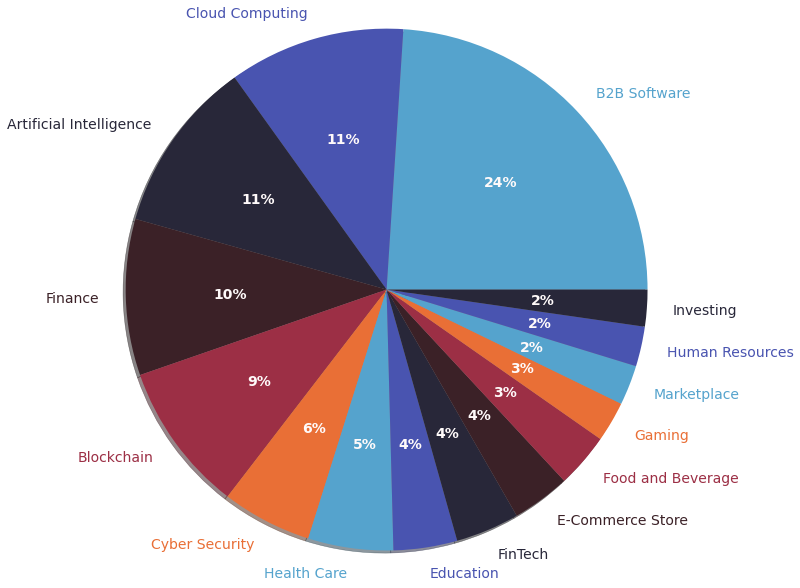

In [29]:
colors = sns.set_palette('icefire')
patches,text, pcts= plt.pie(x='Total_No.',labels='Vertical',autopct='%1.0f%%',data=Vertical,colors=colors,
                            radius=2,shadow=True,textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [30]:
Funding_Stage = df["Funding_Stage"].value_counts().sort_values(ascending=False).head(11)
Funding_Stage = Funding_Stage.reset_index().rename(columns={'index':'Funding_Stage','Funding_Stage':'Total_No.'})
Funding_Stage

,Funding_Stage,Total_No.
0,Series A,951
1,Seed,852
2,Series B,650
3,Series C,463
4,Series D,249
5,Series E,135
6,Unknown,64
7,Series F,62
8,Pre-Seed,58
9,Series G,26


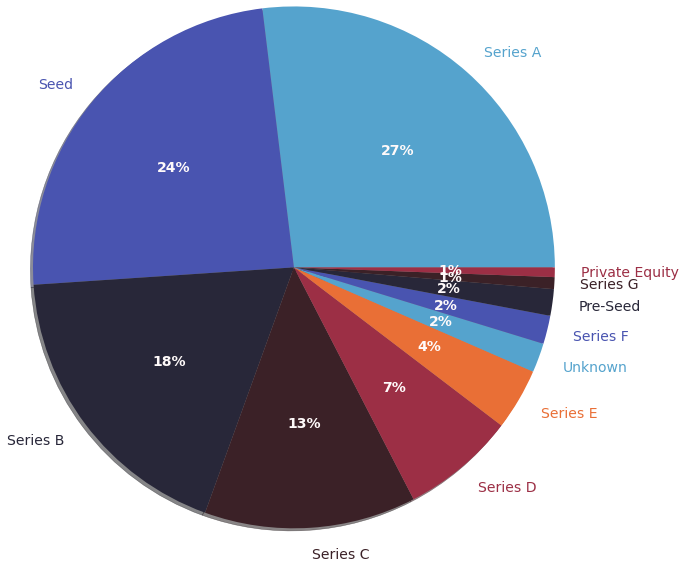

In [31]:
colors = sns.set_palette('icefire')
patches,text, pcts= plt.pie(x='Total_No.',labels='Funding_Stage',autopct='%1.0f%%',data=Funding_Stage,colors=colors,
                            radius=2,shadow=True,textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

In [32]:
Funding_Amount = df.sort_values(by='Funding_Amount_(USD)',ascending=False).head(15).reset_index()
Funding_Amount.drop('index',axis=1,inplace=True)
Funding_Amount

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,WestConnex,Australia,Transportation,1.660000e+10,Private Equity,2021-09-01
1,SpaceX,United States,Aerospace,1.901447e+09,Unknown,2020-08-01
2,Databricks,United States,Artificial Intelligence,1.600000e+09,Series H,2021-08-01
3,Articulate,United States,Education,1.500000e+09,Series A,2021-07-01
4,Gojek,Indonesia,Food Delivery,1.200000e+09,Series G,2020-03-01
5,Gopuff,United States,Transportation,1.150000e+09,Series G,2021-03-01
6,Celonis,Germany,Cloud Computing,1.000000e+09,Series D,2021-06-01
7,FTX Exchange,United States,Blockchain,9.000000e+08,Series B,2021-07-01
8,Trade Republic,Germany,Investing,9.000000e+08,Series C,2021-05-01
9,Revolut,United Kingdom,Finance,8.000000e+08,Series E,2021-07-01


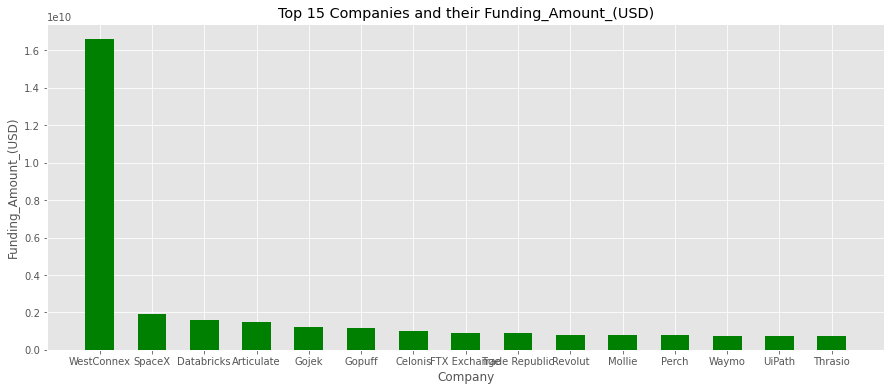

In [33]:
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(Funding_Amount['Company'], Funding_Amount['Funding_Amount_(USD)'], color = 'green', width = 0.55, align = 'center')
plt.xlabel("Company")
plt.ylabel("Funding_Amount_(USD)")
plt.title('Top 15 Companies and their Funding_Amount_(USD)')
plt.show()

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funding_Amount_(USD)'>

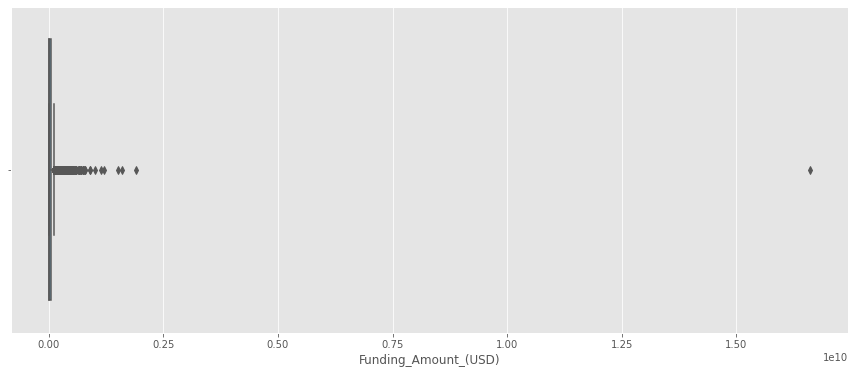

In [34]:
sns.boxplot(df['Funding_Amount_(USD)'])


G:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


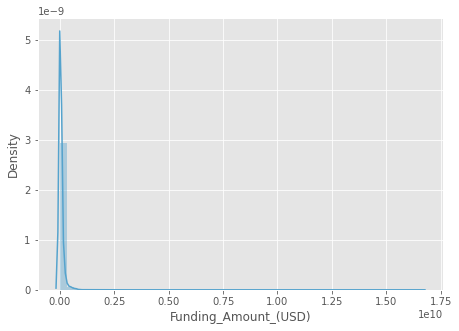

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Funding_Amount_(USD)'])



plt.show()

In [36]:
df['Funding_Stage'].unique()

array(['Seed', 'Angel', 'Series A', 'Series B', 'Series C', 'Series D',
       'Series E', 'Series F', 'Series G', 'Debt Financing', 'Pre-Seed',
       'Unknown', 'ICO', 'Initial Coin Offering', 'Unkown',
       'Private Equity', 'Undisclosed', 'Grant', 'Series H', 'Funding',
       'Crowdfunding', 'Growth'], dtype=object)

In [37]:
del df["Company"]
df.head()

,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Spain,Blockchain,278940.0,Seed,2020-01-01
1,Belgium,Logistics,292244.0,Seed,2020-01-01
2,France,Developer APIs,300000.0,Seed,2020-01-01
3,United States,Artificial Intelligence,300000.0,Seed,2020-01-01
4,United Kingdom,Artificial Intelligence,529013.0,Seed,2020-01-01


In [38]:
df.columns

Index(['Region', 'Vertical', 'Funding_Amount_(USD)', 'Funding_Stage',
       'Funding_Date'],
      dtype='object')

In [39]:
df= pd.get_dummies(df,columns = ["Region","Vertical",'Funding_Date'],drop_first = True)

In [40]:
df.head()

,Funding_Amount_(USD),Funding_Stage,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,...,Funding_Date_2020-11-01 00:00:00,Funding_Date_2021-01-01 00:00:00,Funding_Date_2021-02-01 00:00:00,Funding_Date_2021-03-01 00:00:00,Funding_Date_2021-04-01 00:00:00,Funding_Date_2021-05-01 00:00:00,Funding_Date_2021-06-01 00:00:00,Funding_Date_2021-07-01 00:00:00,Funding_Date_2021-08-01 00:00:00,Funding_Date_2021-09-01 00:00:00
0,278940.0,Seed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,292244.0,Seed,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,300000.0,Seed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300000.0,Seed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,529013.0,Seed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X = df.loc[:,df.columns!= 'Funding_Stage']
y = df["Funding_Stage"]

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
print(y)

[10 10 10 ...  1 12 10]


In [44]:
y

array([10, 10, 10, ...,  1, 12, 10])

In [45]:
y.shape

(3575,)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [48]:
X_train.head()

,Funding_Amount_(USD),Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,...,Funding_Date_2020-11-01 00:00:00,Funding_Date_2021-01-01 00:00:00,Funding_Date_2021-02-01 00:00:00,Funding_Date_2021-03-01 00:00:00,Funding_Date_2021-04-01 00:00:00,Funding_Date_2021-05-01 00:00:00,Funding_Date_2021-06-01 00:00:00,Funding_Date_2021-07-01 00:00:00,Funding_Date_2021-08-01 00:00:00,Funding_Date_2021-09-01 00:00:00
2730,5000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70,22000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3248,12979090.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
527,20000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2434,6000000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
X_train.shape

(2860, 232)

In [81]:
y_train.shape

(2860,)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

In [80]:
#initial model without hyperparameter tuning
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.42657342657342656

In [86]:
#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8],
    'max_features':[4,5,6,7,8],
    'min_samples_leaf':np.arange(1,10)
}
obj = RandomizedSearchCV(model,param_distributions = params,cv = 10)

In [87]:
obj.fit(X, y)

G:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [88]:
obj.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=6,
                       min_samples_leaf=7, random_state=0)

In [89]:
obj.best_params_

{'min_samples_leaf': 7,
 'max_features': 6,
 'max_depth': 6,
 'criterion': 'entropy'}

In [90]:
obj.best_score_

0.31693660704505267

In [92]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=0, splitter='best')

In [93]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=6,
                       min_samples_leaf=7, random_state=0)

In [94]:
y_pred = model.predict(X_test)

In [95]:
acc = accuracy_score(y_test,y_pred)
acc

0.31888111888111886

In [99]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names= X_train.columns, filled = True)

In [100]:
from IPython.display import Image

In [101]:
import pydotplus

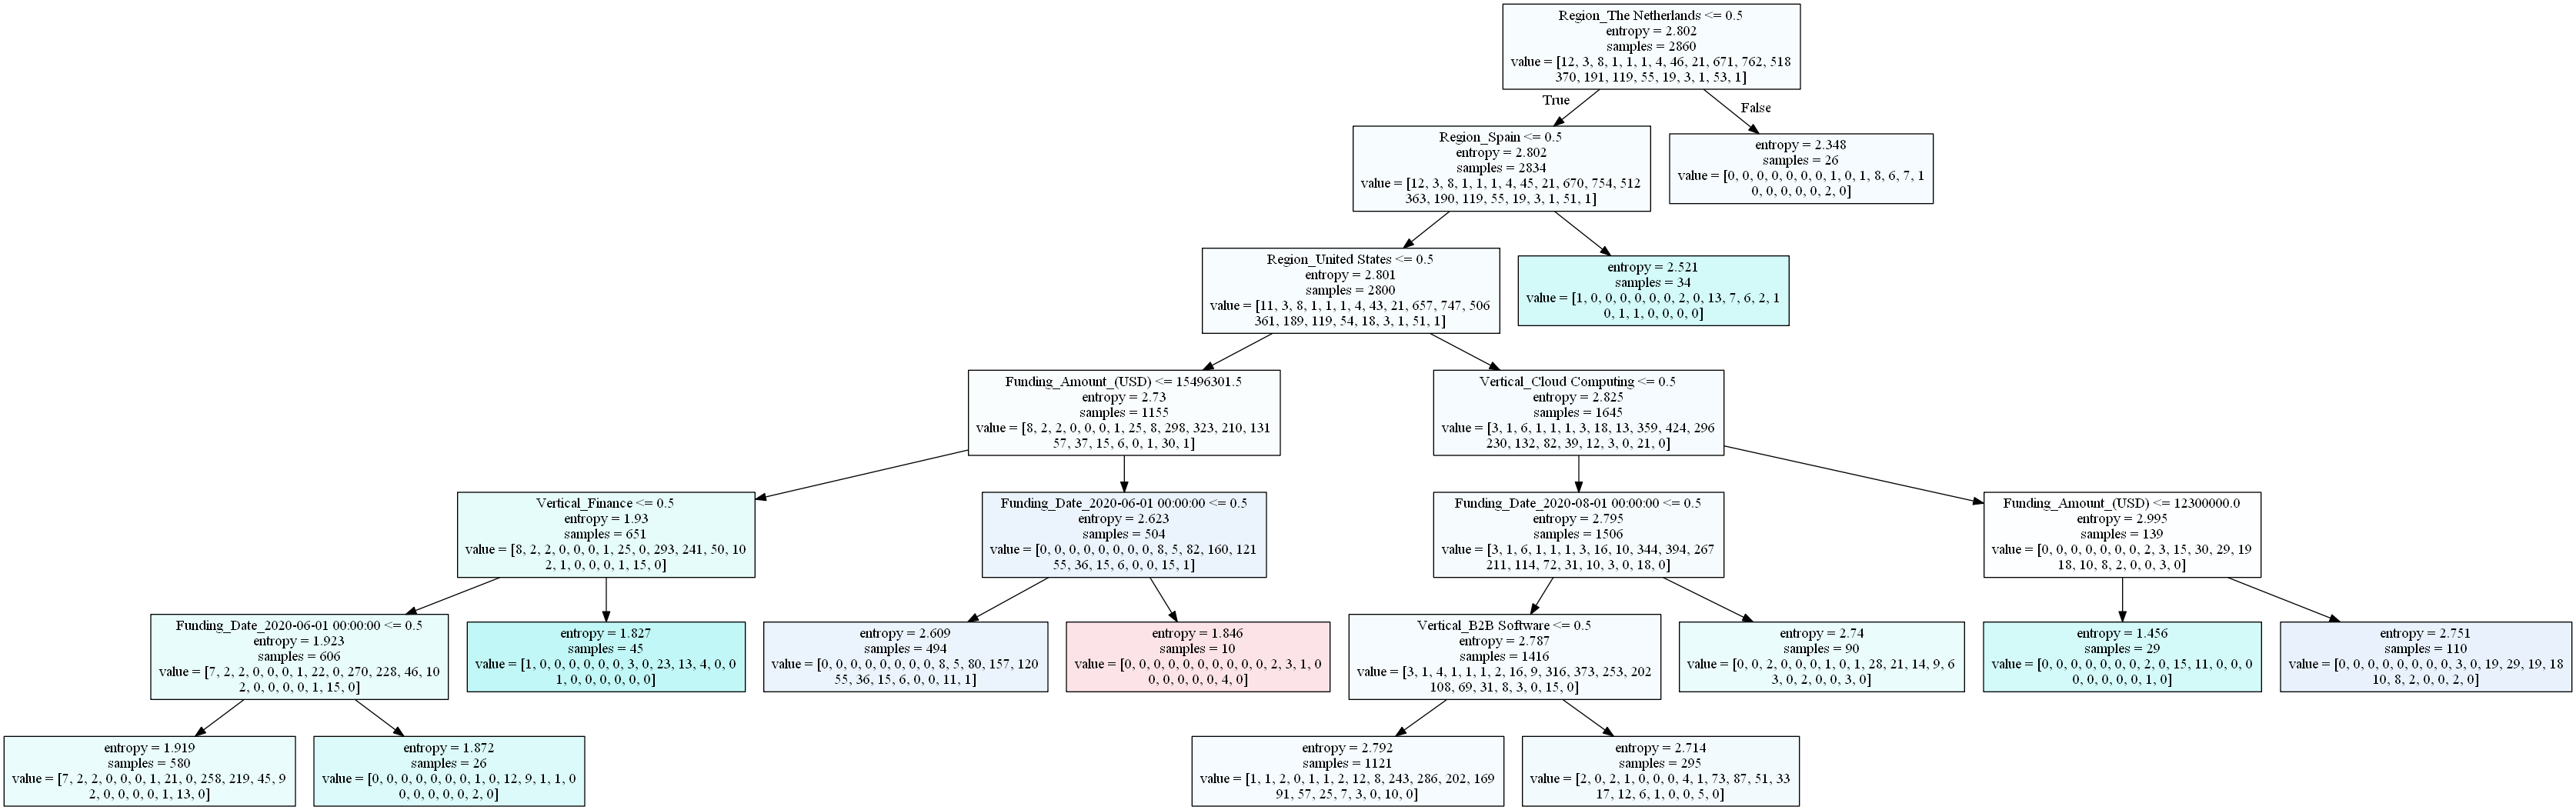

In [102]:

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())